In [5]:
# Incluimos el módulo numpy
import numpy as np

# Incluimos los módulos necesarios para crear la gráfica
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [6]:
# Función que multiplica matrices, alternatica a np.dot()
def matrix_multiplication(m_1: np.ndarray, m_2: np.ndarray):
    dim1 = np.shape(m_1)
    dim2 = np.shape(m_2)
    if dim1[1] != dim2[0]:
        return np.array([])
    res = np.empty((dim1[0], dim2[1]))
    for i in range(dim1[0]):
        for j in range(dim2[1]):
            res[i][j] = 0
            for k in range(dim2[1]):
                res[i][j] += m_1[i][k] * m_2[k][j]
    return res

In [7]:
# Función para medir los tiempos de la multiplicación de matrices con dimensiones variables
def best_time()-> list:
    l_timings = []
    
    for i in range(10, 21):
        dim = 10+i**2
        m = np.random.uniform(0.0, 1.0, size=(dim, dim))
        timings = %timeit -o -n 10 -r 5 -q matrix_multiplication(m, m)
        l_timings.append([dim, timings.best])
    return l_timings

In [8]:
# Obtenemos mejores tiempos de ejecucion de algunas tandas segun dimensiones variables.
# Este es un procedimiento que puede durar un par de horas; por ello, para observar la gráica puede descomentar la siguiente linea y comentar la que estaba por defecto:
l_timings = [[110, 1.1122900000000016], [131, 1.8884299999999712], [154, 3.0433599999000025], [179, 4.788870000100007], [206, 7.343759999899999], [235, 10.846399999999994], [266, 15.770879999999988], [299, 22.257150000000003], [334, 31.243299999999998], [371, 44.62020999999986], [410, 60.48083999990013]]
# l_timings = best_time()

# Convertimos la lista a una numpy array
a_timings = np.array(l_timings)

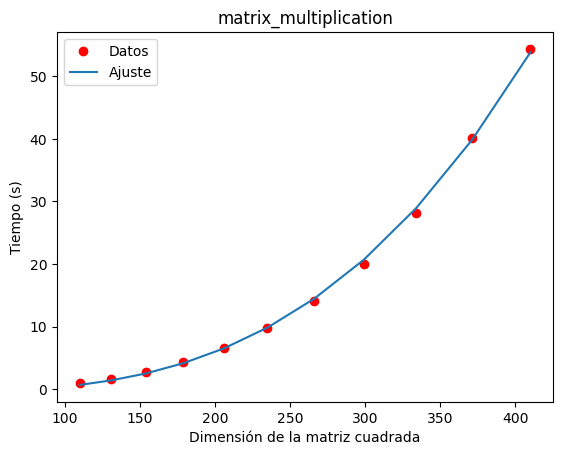

In [10]:
# Función para marcar la trayectoria de la función esperada (función del coste teórico), para así compararla con los datos obtenidos
# Para observar la gráfica con otra posible trayectoria, cambiar el factor que multiplica a la variable 'a' por la fórmula de la nueva gráfica
def tofit(x, a, b):
    return a * x**3 + b

# Cogemos datos del eje 'x'
x = a_timings[: , 0]

# Cogemos datos del eje 'y' y normalizanos las medidas de segundos
y = a_timings[: , 1]
y = y / y[0]

pars, _ = curve_fit(tofit, x, y)
a, b = pars

# Creamos la grafica, dando los valores, nombre a los ejes y un titulo
plt.plot(x, y, 'ro', label='Datos')
plt.plot(x, tofit(x, a, b), label='Ajuste')
plt.xlabel("Dimensión de la matriz cuadrada")
plt.ylabel("Tiempo (s)")
plt.title("matrix_multiplication")

# Añadimos la leyenda e imprimimos la gráfica
plt.legend()
plt.show()